In [3]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
from scipy.stats import ttest_rel, ttest_ind

usr = !echo $USER
grid_search_dir = '.'
datadir = '.'

grid_search_dir = '/storage/groups/ml01/workspace/anna.schaar/ncem/grid_searches/'
datadir = '/storage/groups/ml01/workspace/anna.schaar/ncem/data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sc.settings.set_figure_params(dpi=80)

## MERFISH wildtype fetal liver

### Linear NCEM model

In [6]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210914_INTERACTIONS_BASELINE_IMAGE_LUWT",
        "210915_INTERACTIONS_IMAGE_LUWT",
    ],
    lateral_resolution=0.1079
)
gs_linear.load_gs()

210914_INTERACTIONS_BASELINE_IMAGE_LUWT: loaded 1 runs with 3-fold cross validation
210915_INTERACTIONS_IMAGE_LUWT: loaded 225 runs with 3-fold cross validation


210914_interactions_baseline_image_luwt_adam_lr1_bsS_md0_n10_fsstandard_l21_l11
210915_interactions_image_luwt_adam_lr1_bsS_md0_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_IMAGE'], given was ['INTERACTIONS_BASELINE_IMAGE']
None
210915_interactions_image_luwt_adam_lr1_bsS_md1_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_IMAGE'], given was ['INTERACTIONS_BASELINE_IMAGE']
None
210915_interactions_image_luwt_adam_lr1_bsS_md2_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_IMAGE'], given was ['INTERACTIONS_BASELINE_IMAGE']
None
210915_interactions_image_luwt_adam_lr1_bsS_md3_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_IMAGE'], given was ['INTERACTIONS_BASELINE_IMAGE']
None
210915_interactions_image_luwt_adam_lr1_bsS_md4_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_IMAGE'], given was ['

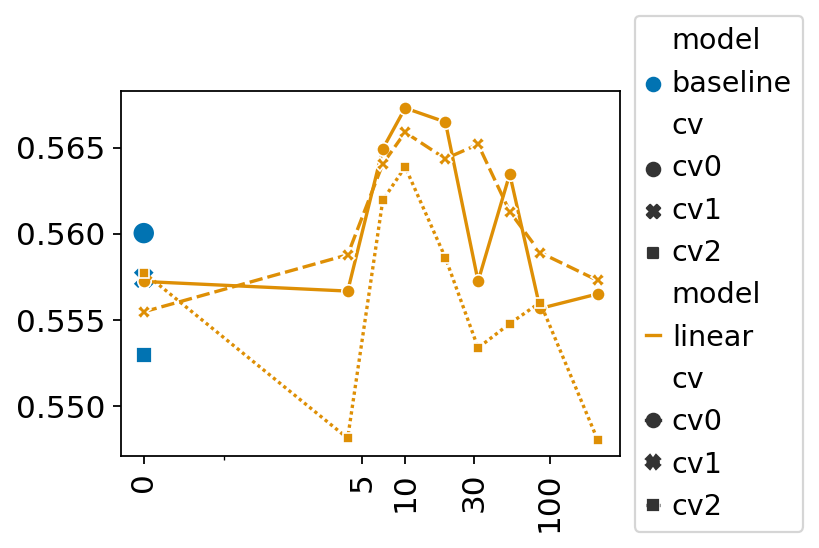

In [7]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_IMAGE": "linear",
            "INTERACTIONS_BASELINE_IMAGE": "baseline",
        })
    ],
    #fontsize=14,
    figsize=(5.,3.),
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 5, 10, 30, 100],
    #save=savedir+"luwt_interactions",
    #suffix="_best_by_hyperparam.pdf"
)

## Imputed fetal liver

### Linear NCEM model

In [8]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "211112_INTERACTIONS_BASELINE_PATIENT_luwt_imputation",
        "211111_INTERACTIONS_PATIENT_luwt_imputation",
    ],
    lateral_resolution=0.1079
)
gs_linear.load_gs()

211112_INTERACTIONS_BASELINE_PATIENT_luwt_imputation: loaded 1 runs with 3-fold cross validation
211111_INTERACTIONS_PATIENT_luwt_imputation: loaded 72 runs with 3-fold cross validation


211112_interactions_baseline_patient_luwt_imputation_adam_lr1_bsS_md0_ri0_n10_fsstandard_l21_l11
211111_interactions_patient_luwt_imputation_adam_lr1_bsS_md0_ri0_n10_fsstandard_l21_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT_luwt'], given was ['INTERACTIONS_BASELINE_PATIENT_luwt']
None
211111_interactions_patient_luwt_imputation_adam_lr1_bsS_md1_ri0_n10_fsstandard_l23_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT_luwt'], given was ['INTERACTIONS_BASELINE_PATIENT_luwt']
None
211111_interactions_patient_luwt_imputation_adam_lr1_bsS_md2_ri0_n10_fsstandard_l21_l13
subset was empty, available values for model are ['INTERACTIONS_PATIENT_luwt'], given was ['INTERACTIONS_BASELINE_PATIENT_luwt']
None
211111_interactions_patient_luwt_imputation_adam_lr1_bsS_md3_ri0_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_PATIENT_luwt'], given was ['INTERACTIONS_BASELINE_PATIENT_luwt']
None
211111_interact

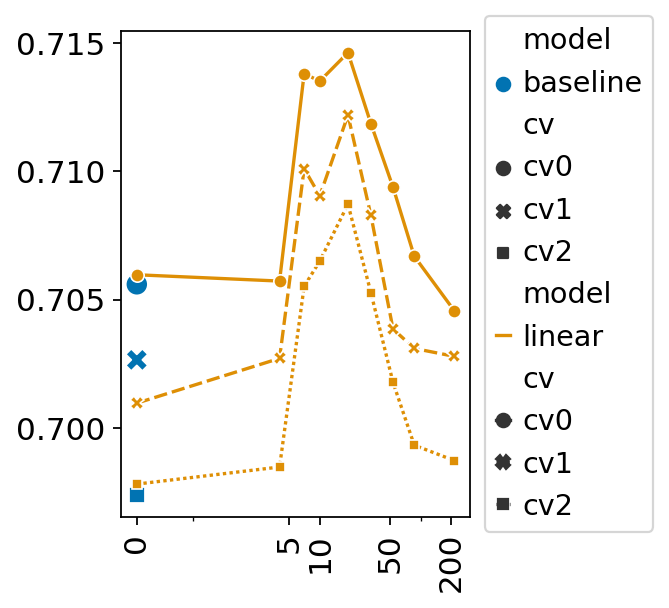

In [9]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_PATIENT_luwt": "linear",
            "INTERACTIONS_BASELINE_PATIENT_luwt": "baseline",
        })
    ],
    #fontsize=14,
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 5, 10, 50, 200],
    #save=savedir+"merfish_tangram_imputation_interactions_patient",
    #suffix="_best_by_hyperparam.pdf"
)

In [10]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_PATIENT_luwt")],
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_PATIENT_luwt")],
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=14.295553991790698, pvalue=0.0048576314076631075)


### Non-linear NCEM IND model

In [11]:
gs_ed = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "211123_ED_PATIENT_luwt_imputation",
        "211123_ED_NCEM_MAX_PATIENT_luwt_imputation",
    ],
    lateral_resolution=0.1079
)
gs_ed.load_gs()

211123_ED_PATIENT_luwt_imputation: loaded 12 runs with 3-fold cross validation
211123_ED_NCEM_MAX_PATIENT_luwt_imputation: loaded 95 runs with 3-fold cross validation


211123_ed_ncem_max_patient_luwt_imputation_adam_lr1_bsS_md0_n10_fsstandard_l22_l11_ldi1_ei5_di6_ede0_dde0_dr1_COND_cde1_cbTrue_cdi0_cdr1_cl22
211123_ed_patient_luwt_imputation_adam_lr1_bsS_md0_n10_fsstandard_l22_l11_ldi3_ei6_di5_ede0_dde0_dr1
211123_ed_ncem_max_patient_luwt_imputation_adam_lr1_bsS_md2_n10_fsstandard_l22_l11_ldi1_ei5_di6_ede0_dde0_dr1_COND_cde1_cbTrue_cdi0_cdr1_cl22
subset was empty, available values for model are ['ED_NCEM_MAX_PATIENT_luwt'], given was ['ED_PATIENT_luwt']
None
211123_ed_ncem_max_patient_luwt_imputation_adam_lr1_bsS_md4_n10_fsstandard_l22_l11_ldi2_ei5_di6_ede0_dde0_dr1_COND_cde1_cbTrue_cdi0_cdr1_cl22
subset was empty, available values for model are ['ED_NCEM_MAX_PATIENT_luwt'], given was ['ED_PATIENT_luwt']
None
211123_ed_ncem_max_patient_luwt_imputation_adam_lr1_bsS_md8_n10_fsstandard_l22_l11_ldi1_ei6_di6_ede0_dde0_dr1_COND_cde1_cbTrue_cdi0_cdr1_cl22
subset was empty, available values for model are ['ED_NCEM_MAX_PATIENT_luwt'], given was ['ED_PATIENT_l

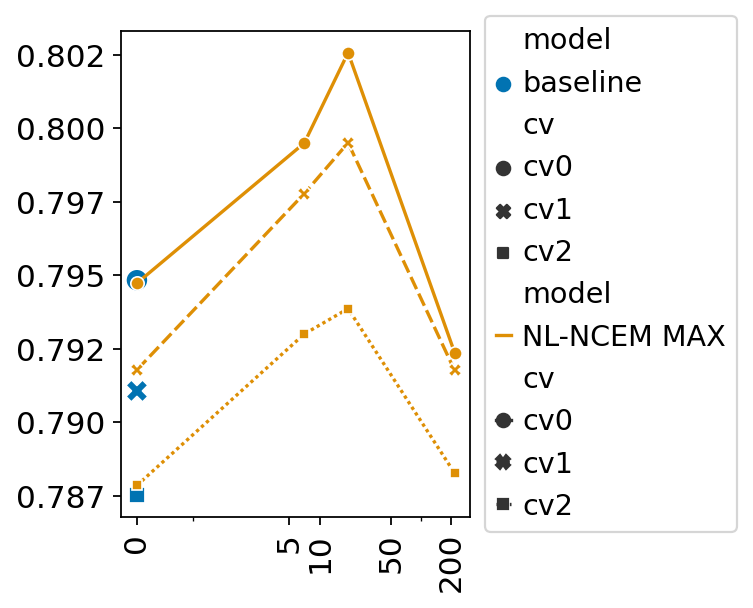

In [12]:
gs_ed.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='ed_ncem',
    baseline_model_class='ed',
    rename_levels = [
        ("model", {
            "ED_PATIENT_luwt": "baseline",
            "ED_NCEM_MAX_PATIENT_luwt": "NL-NCEM MAX",
        })
    ],
    #fontsize=14,
    #figsize=(3.5,3),
    plot_mode = 'lineplot',
    #yaxis_limit=(0.695, 0.810),
    palette = {"baseline": "C0", "NL-NCEM MAX": "C1"},
    xticks=[0, 5, 10, 50, 200],
    #save=savedir+"luwt_imputed_nl_max",
    #suffix="_best_by_hyperparam.pdf"
)

### Non-linear NCEM ligand-receptor model

## $\text{Tet}^{2-/-}$ fetal liver

In [4]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "211029_INTERACTIONS_BASELINE_PATIENT_LUTET2",
        "211029_INTERACTIONS_PATIENT_LUTET2",
        "211102_INTERACTIONS_PATIENT_LUTET2",
        "211103_INTERACTIONS_PATIENT_LUTET2"
    ],
    lateral_resolution=0.1079
)
gs_linear.load_gs()

211029_INTERACTIONS_BASELINE_PATIENT_LUTET2: loaded 1 runs with 3-fold cross validation
211029_INTERACTIONS_PATIENT_LUTET2: loaded 101 runs with 3-fold cross validation
211102_INTERACTIONS_PATIENT_LUTET2: loaded 108 runs with 3-fold cross validation
211103_INTERACTIONS_PATIENT_LUTET2: loaded 108 runs with 3-fold cross validation


211029_interactions_baseline_patient_lutet2_adam_lr1_bsS_md0_ri0_n10_fsstandard_l21_l11
211103_interactions_patient_lutet2_adam_lr1_bsS_md0_ri0_n10_fsstandard_l27_l13
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211103_interactions_patient_lutet2_adam_lr1_bsS_md1_ri0_n10_fsstandard_l27_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211103_interactions_patient_lutet2_adam_lr1_bsS_md2_ri0_n10_fsstandard_l23_l13
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211103_interactions_patient_lutet2_adam_lr1_bsS_md3_ri0_n10_fsstandard_l27_l11
subset was empty, available values for model are ['INTERACTIONS_PATIENT'], given was ['INTERACTIONS_BASELINE_PATIENT']
None
211103_interactions_patient_lutet2_adam_lr1_bsS_md4_ri0_n10_fsstandard_l23_l13
subset was empty, ava

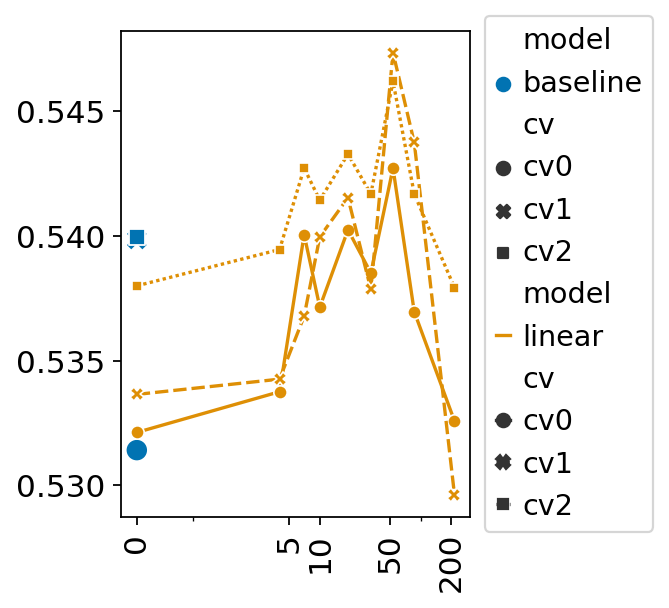

In [5]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_PATIENT": "linear",
            "INTERACTIONS_BASELINE_PATIENT": "baseline",
        })
    ],
    #fontsize=14,
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 5, 10, 50, 200],
    #save=savedir+"merfish_liver_tet2_interactions_patient",
    #suffix="_best_by_hyperparam.pdf"
)